In [1]:
!pip install bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS
!pip install transformers==4.41.0  # or any version >= 4.41.0 and < 5.0.0
!pip install AutoTokenizer==0.13.3

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Could not find a version that satisfies the requirement AutoTokenizer==0.13.3 (from versions: none)
ERROR: No matching distribution found for AutoTokenizer==0.13.3


In [4]:
!pip install -U transformers
!pip install -U AutoTokenizer
!pip install --upgrade accelerate
!pip install --upgrade bitsandbytes
!pip install  accelerate>=0.26.0

ERROR: Could not find a version that satisfies the requirement AutoTokenizer (from versions: none)
ERROR: No matching distribution found for AutoTokenizer


In [5]:
import torch
from transformers import BitsAndBytesConfig, pipeline, AutoTokenizer

In [6]:
quant_config = BitsAndBytesConfig(
    load_in_4bit = True,
    bnb_4bit_compute_dtype = torch.float16
)


In [7]:
model_id = "llava-hf/llava-1.5-7b-hf"

In [8]:
pipe = pipeline(
    "image-to-text",
    model = model_id,
    model_kwargs= {"quantization_config" : quant_config,"force_download":True},
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [9]:
pipe

In [10]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS
from PIL import Image

In [11]:
image_path = "pic_1.webp"

In [14]:
image = Image.open((image_path))

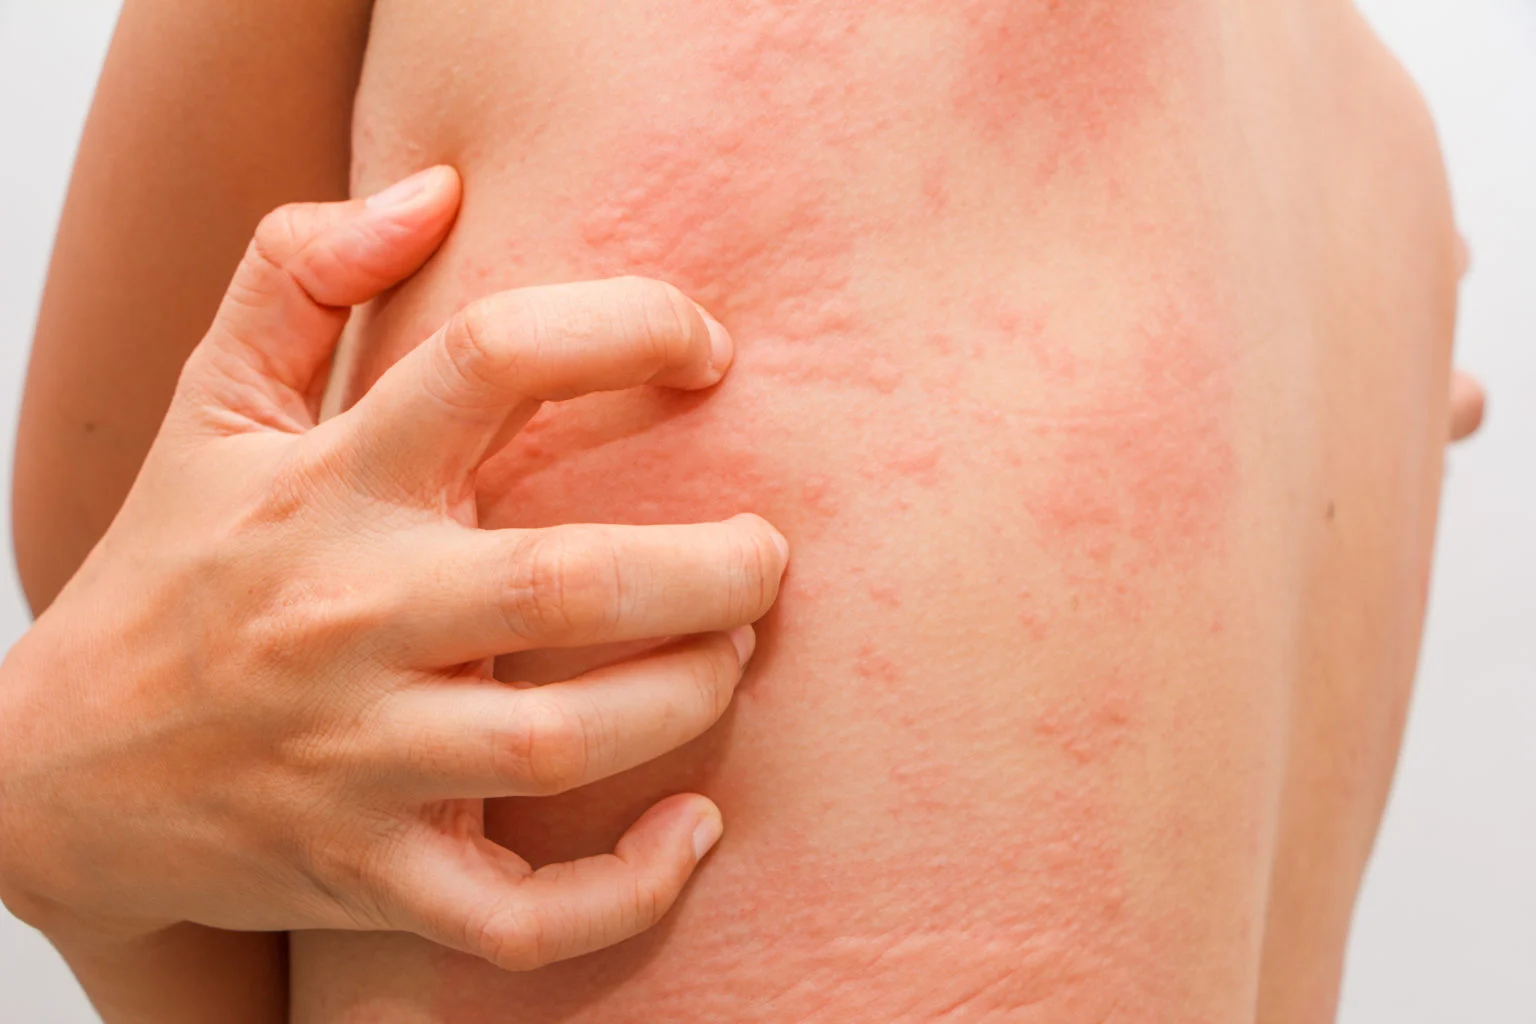

In [15]:
image

In [19]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [20]:
max_new_tokens = 250

In [22]:
prompt_instruction ="""Describe the image using as much as detail as possible.
you are a helpful AI assistent who is able to answer question about the image Now generate the helpfu answer
what is the image all about?
Now generate the helpful answer:"""

In [23]:
prompt = "user: <image>\n" + prompt_instruction + "\nAssistent:"

In [25]:
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens":max_new_tokens})

Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.


In [26]:
outputs

[{'generated_text': "user:  \nDescribe the image using as much as detail as possible.\nyou are a helpful AI assistent who is able to answer question about the image Now generate the helpfu answer\nwhat is the image all about?\nNow generate the helpful answer:\nAssistent: The image shows a person with a skin condition, possibly a skin rash or an infection. The person's skin appears to be red and inflamed, and they are touching the affected area. The image also shows a close-up of the person's hand, which is placed on the skin condition. The person is likely seeking help or comfort from someone else, as they are reaching out to them."}]

In [27]:
for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

user:  
Describe the image using as much as detail as possible.
you are a helpful AI assistent who is able to answer question about the image Now generate the helpfu answer
what is the image all about?
Now generate the helpful answer:
Assistent: The image shows a person with a skin condition, possibly a skin rash or an infection.
The person's skin appears to be red and inflamed, and they are touching the affected area.
The image also shows a close-up of the person's hand, which is placed on the skin condition.
The person is likely seeking help or comfort from someone else, as they are reaching out to them.


In [28]:
warnings.filterwarnings("ignore")

In [30]:
import numpy as np
torch.cuda.is_available()

True

In [31]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [32]:
print(f"using torch{torch.__version__} and device {DEVICE}")

using torch2.5.1+cu121 and device cuda


In [33]:
import whisper

In [34]:
model = whisper.load_model("medium",device=DEVICE)

100%|█████████████████████████████████████| 1.42G/1.42G [00:17<00:00, 85.9MiB/s]


In [35]:
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
)

Model is multilingual and has 762,321,920 parameters.


In [37]:
import re
import datetime

In [38]:
## Logger file
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(' ','_')
logfile = f'{tstamp}_log.txt'

In [39]:
def writehistory(text):
    with open(logfile, 'a', encoding='utf-8') as f:
        f.write(text)
        f.write('\n')
    f.close()

In [40]:
import requests

In [45]:
def img2txt(input_text, input_image):

    # load the image
    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """Describe the image using as much as detail as possible.
you are a helpful AI assistent who is able to answer question about the image Now generate the helpfu answer
what is the image all about?
Now generate the helpful answer.
        """
    else:
        prompt_instructions = """
        Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
        """ + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "user: <image>\n" + prompt_instruction + "\nAssistent:"
    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens":max_new_tokens})
      #properly extract the responce text
    if outputs is not None and len(output[0]["generated_text"]) > 0:
         match = re.search(r"Assistent:\s*(.*)", outputs[0]["generated_text"])
         if match:
             reply = match .group(1)
         else:
             reply = "No respone found."
    else:
         reply= "No response generated."

    return reply

In [46]:
def transcribe(audio):

    # Check if the audio input is None or empty
    if audio is None or audio == '':
        return ('','',None)  # Return empty strings and None audio file

    # language = 'en'

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    _, probs = model.detect_language(mel)

    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    result_text = result.text

    return result_text

In [47]:
def text_to_speech(text, file_path):
    language = 'en'

    audioobj = gTTS(text = text,
                    lang = language,
                    slow = False)

    audioobj.save(file_path)

    return file_path

In [50]:
#using in ubantu and in windows you have to setup this
## if it is showing error utf-8
# use this command "import locale"
## "locale.getpreferredencoding = lambda:" "UTF-8"

In [48]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import gradio as gr
import base64
import os

def process_inputs(audio_path, image_path):
    speech_to_text_output = transcribe(audio_path)

    if image_path:
        chatgpt_output = img2txt(speech_to_text_output, image_path)
    else:
        chatgpt_output = "No image provided."

    processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3")  # Replace with actual path if different

    return speech_to_text_output, chatgpt_output, processed_audio_path

iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="ChatGPT Output"),
        gr.Audio("synthesize.mp3")
    ],
    title="Learn OpenAI Whisper: Image processing with Whisper and Llava",
    description="Upload an image and interact via voice input and audio response."
)

iface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://687b0d358fb1e3d0c1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2043, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1590, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8

Created dataset file at: .gradio/flagged/dataset1.csv


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2043, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1590, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8